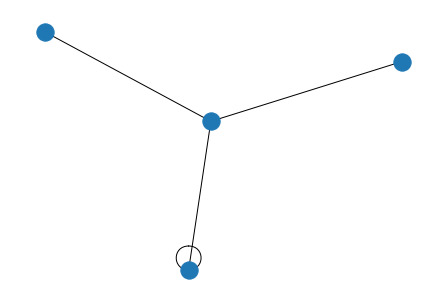

In [1]:
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
g = nx.Graph()
g.add_nodes_from((1,2,3,4))
g.add_edges_from([(2, 3), (1, 2), (2, 4), (1, 1)])
nx.draw(g)
plt.show()

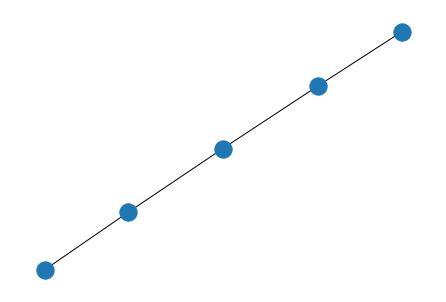

Graph with 5 nodes and 4 edges


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.Graph()
for i in range(5):
    g.add_node(i)
for i in range(4):
    g.add_edge(i, i+1)
nx.draw(g)
plt.show()
print(g)

In [3]:
from networkx.readwrite import json_graph
g = nx.Graph()
g.add_nodes_from((1,2,3,4))
g.add_edges_from([(2, 3), (1, 2), (1, 1), (4, 4)])
json_data = json_graph.node_link_data(g)
json_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 1},
  {'source': 2, 'target': 3},
  {'source': 4, 'target': 4}]}

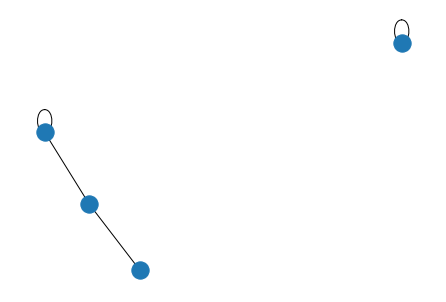

In [4]:
from networkx.readwrite import json_graph
new_graph = json_graph.node_link_graph(json_data)
nx.draw(new_graph)
plt.show()

In [5]:
# print(g, new_graph)
print(g.number_of_edges())
print(g.number_of_nodes())
print(g.degree)
print(g.nodes, g.edges)
print(nx.density(g))
# density for undirected graphs = 2m/n(n-1)
# density for directed graphs = m/n(n-1)
# where n is the number of nodes and m is the number of edges in G.

4
4
[(1, 3), (2, 2), (3, 1), (4, 2)]
[1, 2, 3, 4] [(1, 2), (1, 1), (2, 3), (4, 4)]
0.6666666666666666


1 has neighbors: [2, 1]
2 has neighbors: [3, 1]
3 has neighbors: [2]
4 has neighbors: [4]
False
False
{1: {2: {}, 1: {}}, 2: {3: {}, 1: {}}, 3: {2: {}}, 4: {4: {}}}


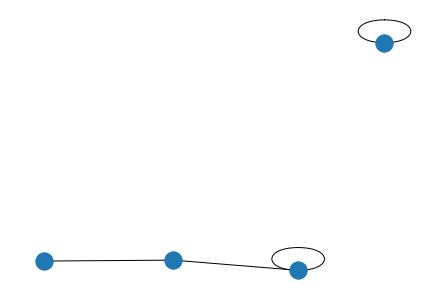

In [6]:
from networkx.classes.function import neighbors
print(neighbors(g, 2))

for i in g.nodes:
    print(i, 'has neighbors:', list(g.neighbors(i)))
print(g.is_directed())
print(g.is_multigraph())
print(g.adj)
nx.draw(g)
plt.show()

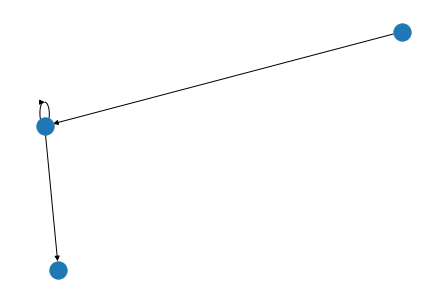

In [7]:
dg = nx.DiGraph()
dg.add_nodes_from((1,2,3))
dg.add_edge(1, 2, weight=1)
dg.add_edge(3, 1, weight=-1)
dg.add_edge(1, 1, weight=2)
nx.draw(dg)
plt.show()

In [8]:
print(dg.is_directed(), nx.is_weighted(dg))
print('Adjacency Matrix')
print(nx.to_numpy_array(dg))
print('Nodes:', dg.nodes, ' Edges:', dg.edges)
print('Degree:', dg.degree, "Density: ", nx.density(dg))
print("Order", dg.order())
from networkx.classes.function import neighbors
print(1, 'has neighbors:', list(neighbors(dg, 1)))
plt.show()

True True
Adjacency Matrix
[[ 2.  1.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]
Nodes: [1, 2, 3]  Edges: [(1, 2), (1, 1), (3, 1)]
Degree: [(1, 4), (2, 1), (3, 1)] Density:  0.5
Order 3
1 has neighbors: [2, 1]


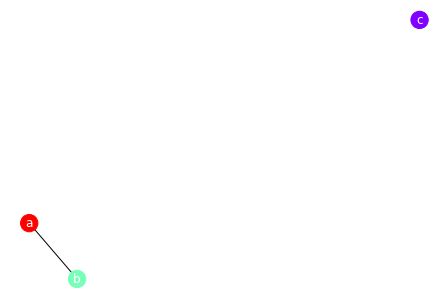

In [20]:
graph = nx.Graph()
graph.add_nodes_from(('a', 'b', 'c'))
graph.add_edges_from([('a', 'b')])
nx.draw(graph, with_labels=True, node_color=[1, 0.7, 0.42], cmap=plt.get_cmap('rainbow'), font_color='white')
plt.show()

In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

1.13.0+cu116


In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')